In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DataDwarf = pd.read_excel('SWC_Dwarf.xlsx')    
for i in DataDwarf.index:
    DataDwarf.loc[i,'DateTime'] = datetime.datetime.strptime(str(DataDwarf.loc[i,'year'])+ ' ' +
                                                        str(DataDwarf.loc[i,'day'])+ ' ' +
                                                        str(DataDwarf.loc[i,'hhmm']).zfill(4),'%Y %j %H%M')
DataDwarf.set_index('DateTime',inplace=True)
DataDwarf.drop(['year','day','hhmm'],axis=1,inplace=True)

In [4]:
DataTall = pd.read_excel('SWC_Tall.xlsx')    
for i in DataTall.index:
    DataTall.loc[i,'DateTime'] = datetime.datetime.strptime(str(DataTall.loc[i,'year'])+ ' ' +
                                                        str(DataTall.loc[i,'day'])+ ' ' +
                                                        str(DataTall.loc[i,'hhmm']).zfill(4),'%Y %j %H%M')
DataTall.set_index('DateTime',inplace=True)
DataTall.drop(['year','day','hhmm'],axis=1,inplace=True)

In [5]:
Data = pd.concat([DataDwarf,DataTall],keys=['Dwarf','Tall'],sort=True)

In [6]:
Data.where(Data>0.03,np.nan,inplace=True)
Data.where(Data<0.8,np.nan,inplace=True)
Data.sort_index(inplace=True)

## Have a look at the Dwarf data

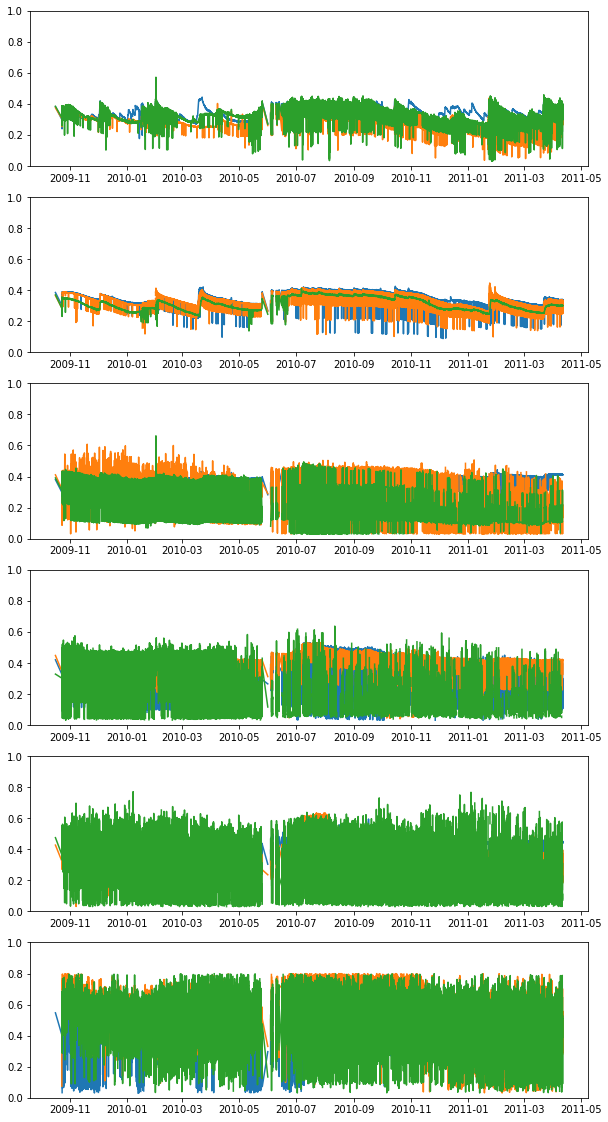

In [7]:
Fig = plt.figure(figsize=(10,20))
pos=1
for s in [1,2,3,4,5,6]:
    Ax = Fig.add_subplot(6,1,pos)
    R1 = 'swc-' + str(s)
    R2 = 'swc-' + str(s+6)
    R3 = 'swc-' + str(s+12)
    plt.plot(Data.loc['Dwarf',(R1,R2,R3)],'-')
    plt.ylim(0,1)
    pos+=1

## 30 min data OK for tall crop but is noisey as crap for the dwarfs.  Appears to be throwing low readings.  Lets try looking at the daily maximum

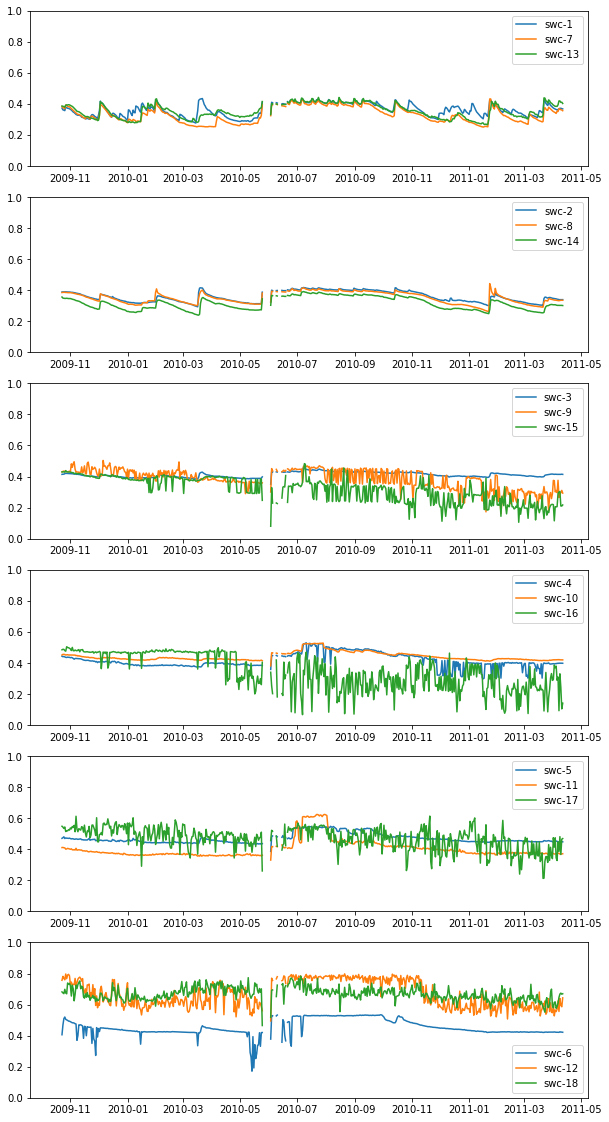

In [8]:
Fig = plt.figure(figsize=(10,20))
pos=1
for s in [1,2,3,4,5,6]:
    Ax = Fig.add_subplot(6,1,pos)
    R1 = 'swc-' + str(s)
    R2 = 'swc-' + str(s+6)
    R3 = 'swc-' + str(s+12)
    for rep in [R1,R2,R3]:
        plt.plot(Data.loc['Dwarf',rep].resample('d').apply(lambda x: x.quantile(0.9)),'-',label=rep)
        plt.ylim(0,1)
    plt.legend()
    pos+=1

## Even looking at the 95th percentile value for the day (assuming most of the errant values were on the low side but a few were on the high side) there are a number of sensors giving crap data.  Will need to exclude these

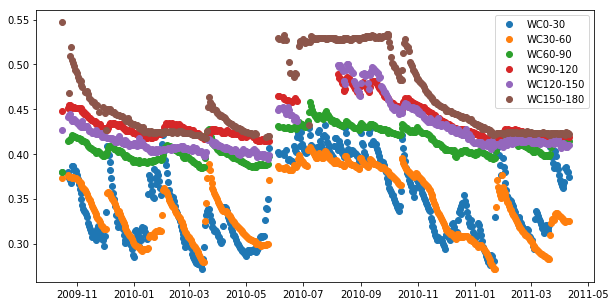

In [9]:
DwarfDailyData = pd.DataFrame(index = Data.loc['Dwarf',:].resample('D').mean().index,
                        columns = ['SW(1)','SW(2)','SW(3)','SW(4)','SW(5)','SW(6)'])
depthLabels = pd.DataFrame(index = DwarfDailyData.columns,
                           data = ['WC0-30','WC30-60','WC60-90','WC90-120','WC120-150','WC150-180'],
                           columns = ['lab'])
def SetData(layer, s, use):
    R1 = 'swc-' + str(s)
    R2 = 'swc-' + str(s+6)
    R3 = 'swc-' + str(s+12)
    Daily = Data.loc['Dwarf',(R1,R2,R3)].resample('d').apply(lambda x: x.quantile(0.9))
    DwarfDailyData.loc[:,layer] = Daily.iloc[:,use].mean(axis=1) 

SetData('SW(1)', 1, [0,1,2])
SetData('SW(2)', 2, [0,1,2])
SetData('SW(3)', 3, [0])
SetData('SW(4)', 4, [1])
SetData('SW(5)', 5, [0,1])
SetData('SW(6)', 6, [0])
DwarfDailyData.dropna(how='all',inplace=True)
DwarfDailyData.loc[:,'SW(6)'] = DwarfDailyData.loc[:,'SW(6)'].where(DwarfDailyData.loc[:,'SW(6)']>0.41,np.nan)
DwarfDailyData.loc['2010-05-26':'2010-06-3',:] = np.nan
DwarfDailyData.loc['2010-06-25':'2010-08-06',('SW(4)','SW(5)')] = np.nan
DwarfDailyData.dropna(how='all',inplace=True)
Fig = plt.figure(figsize=(10,5))
for d in DwarfDailyData.columns:
    plt.plot(DwarfDailyData.loc[:,d],'o',label=depthLabels.loc[d,'lab'])
plt.legend()

## Now lets look at the tall trees

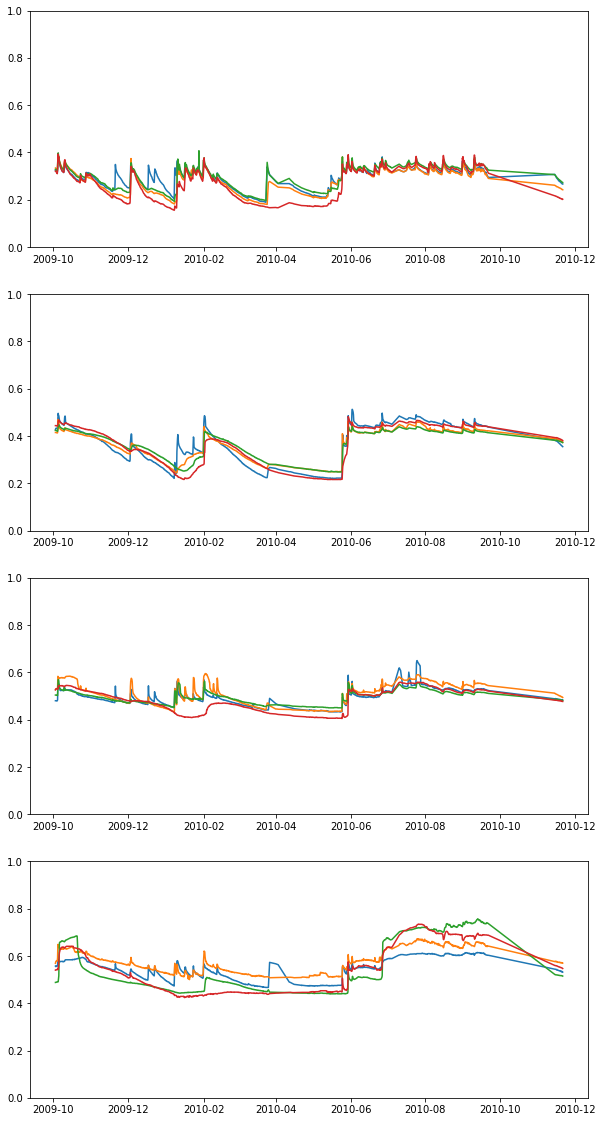

In [10]:
Fig = plt.figure(figsize=(10,20))
pos=1
for s in [1,5,9,13]:
    Ax = Fig.add_subplot(4,1,pos)
    R1 = 'swc-' + str(s)
    R2 = 'swc-' + str(s+1)
    R3 = 'swc-' + str(s+2)
    R4 = 'swc-' + str(s+3)
    plt.plot(Data.loc['Tall',(R1,R2,R3,R4)],'-')
    plt.ylim(0,1)
    pos+=1

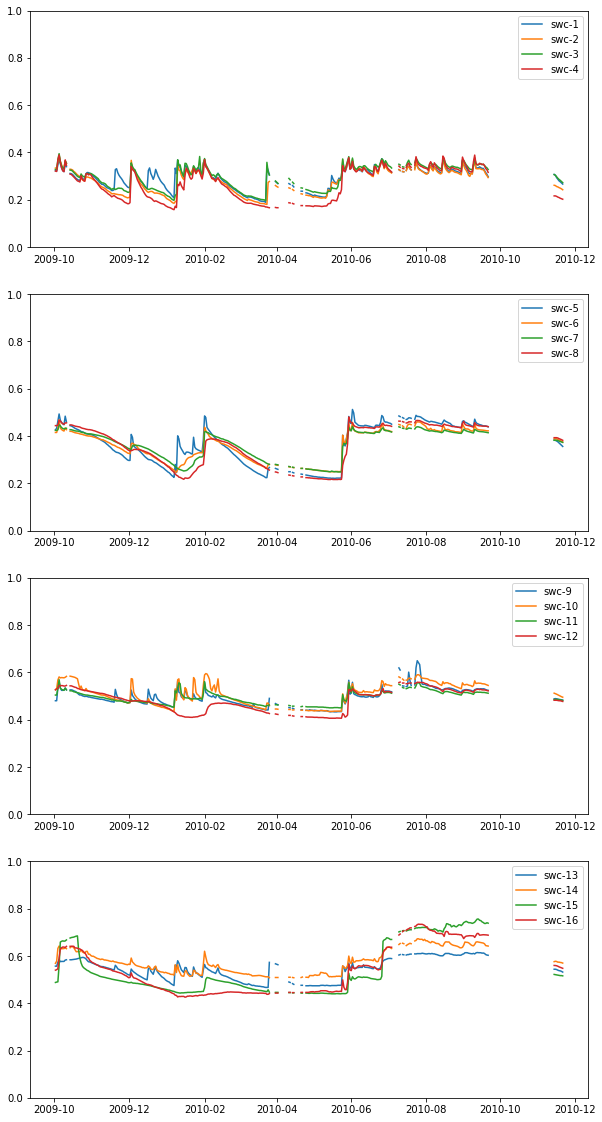

In [11]:
Fig = plt.figure(figsize=(10,20))
pos=1
for s in [1,5,9,13]:
    Ax = Fig.add_subplot(4,1,pos)
    R1 = 'swc-' + str(s)
    R2 = 'swc-' + str(s+1)
    R3 = 'swc-' + str(s+2)
    R4 = 'swc-' + str(s+3)
    for rep in [R1,R2,R3,R4]:
        plt.plot(Data.loc['Tall',rep].resample('d').apply(lambda x: x.quantile(0.9)),'-',label=rep)
        plt.ylim(0,1)
    plt.legend()
    pos+=1

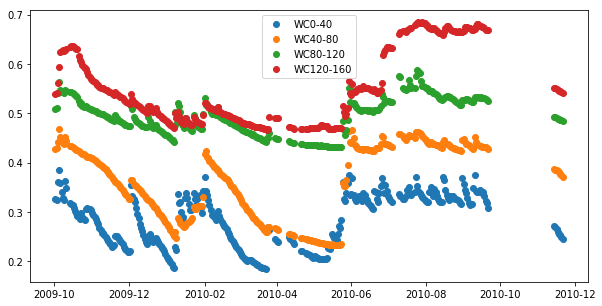

In [12]:
TallDailyData = pd.DataFrame(index = Data.loc['Tall',:].resample('D').mean().index,
                        columns = ['SW(1)','SW(2)','SW(3)','SW(4)'])
depthLabels = pd.DataFrame(index = TallDailyData.columns,
                           data = ['WC0-40','WC40-80','WC80-120','WC120-160'],
                           columns = ['lab'])
def SetData(layer, s, use):
    R1 = 'swc-' + str(s)
    R2 = 'swc-' + str(s+1)
    R3 = 'swc-' + str(s+2)
    R4 = 'swc-' + str(s+3)
    Daily = Data.loc['Tall',(R1,R2,R3,R4)].resample('d').apply(lambda x: x.quantile(0.9))
    TallDailyData.loc[:,layer] = Daily.iloc[:,use].mean(axis=1) 

SetData('SW(1)', 1, [0,1,2,3])
SetData('SW(2)', 5, [0,1,2,3])
SetData('SW(3)', 9, [0,1,2,3])
SetData('SW(4)', 13, [0,1,2,3])

Fig = plt.figure(figsize=(10,5))
for d in TallDailyData.columns:
    plt.plot(TallDailyData.loc[:,d],'o',label=depthLabels.loc[d,'lab'])
plt.legend()

In [16]:
DailyData = pd.concat([DwarfDailyData,TallDailyData],keys=['Dwarf','Tall'],names=['Crop'],sort=True)

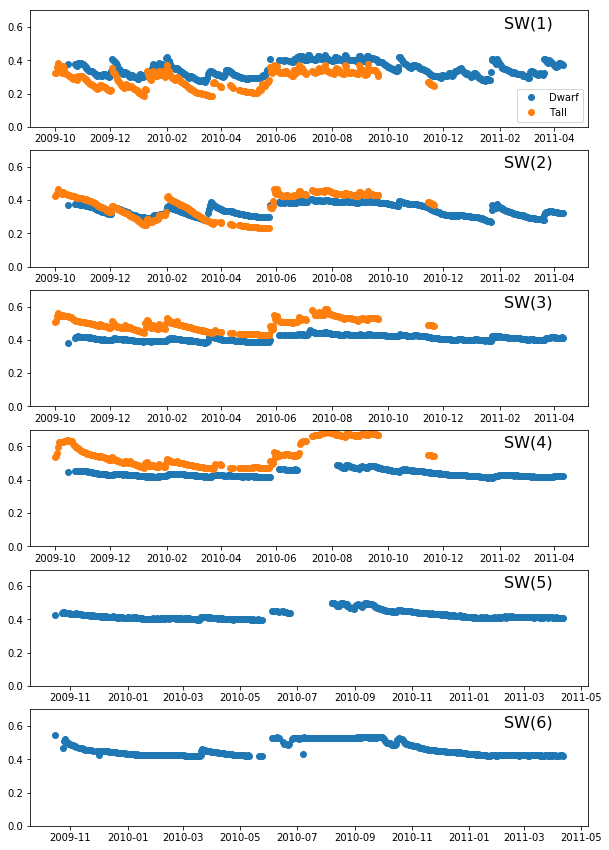

In [14]:
Fig = plt.figure(figsize=(10,15))
pos = 1
for l in DailyData.columns:
    Ax = Fig.add_subplot(6,1,pos)
    for h in ('Dwarf','Tall'):
        plt.plot(DailyData.loc[h,l],'o',label=h)
    plt.text(0.85,0.85,l,transform=Ax.transAxes,fontsize=16)
    plt.ylim(0,0.7)
    if pos ==1:
        plt.legend(loc=4)
    pos+=1

In [18]:
DailyData.to_pickle('SWC.pkl')